# Manufacturing Control Data
In this notebook, we will analyze the manufacturing control data from the Kaggle competition [here](https://www.kaggle.com/competitions/tabular-playground-series-jul-2022).

<div align="center">
<img src="https://www.kaggle.com/competitions/33107/images/header" />
</div>

## 1. Importing Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import joblib

import warnings

### Configurations

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')

## 2. Loading Data

In [4]:
df = pd.read_csv('data.csv', index_col='id')

In [5]:
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [6]:
df.shape

(98000, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22  f_2

In [8]:
df.isnull().sum()

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

## 3. Exploratory Data Analysis

In [12]:
df.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


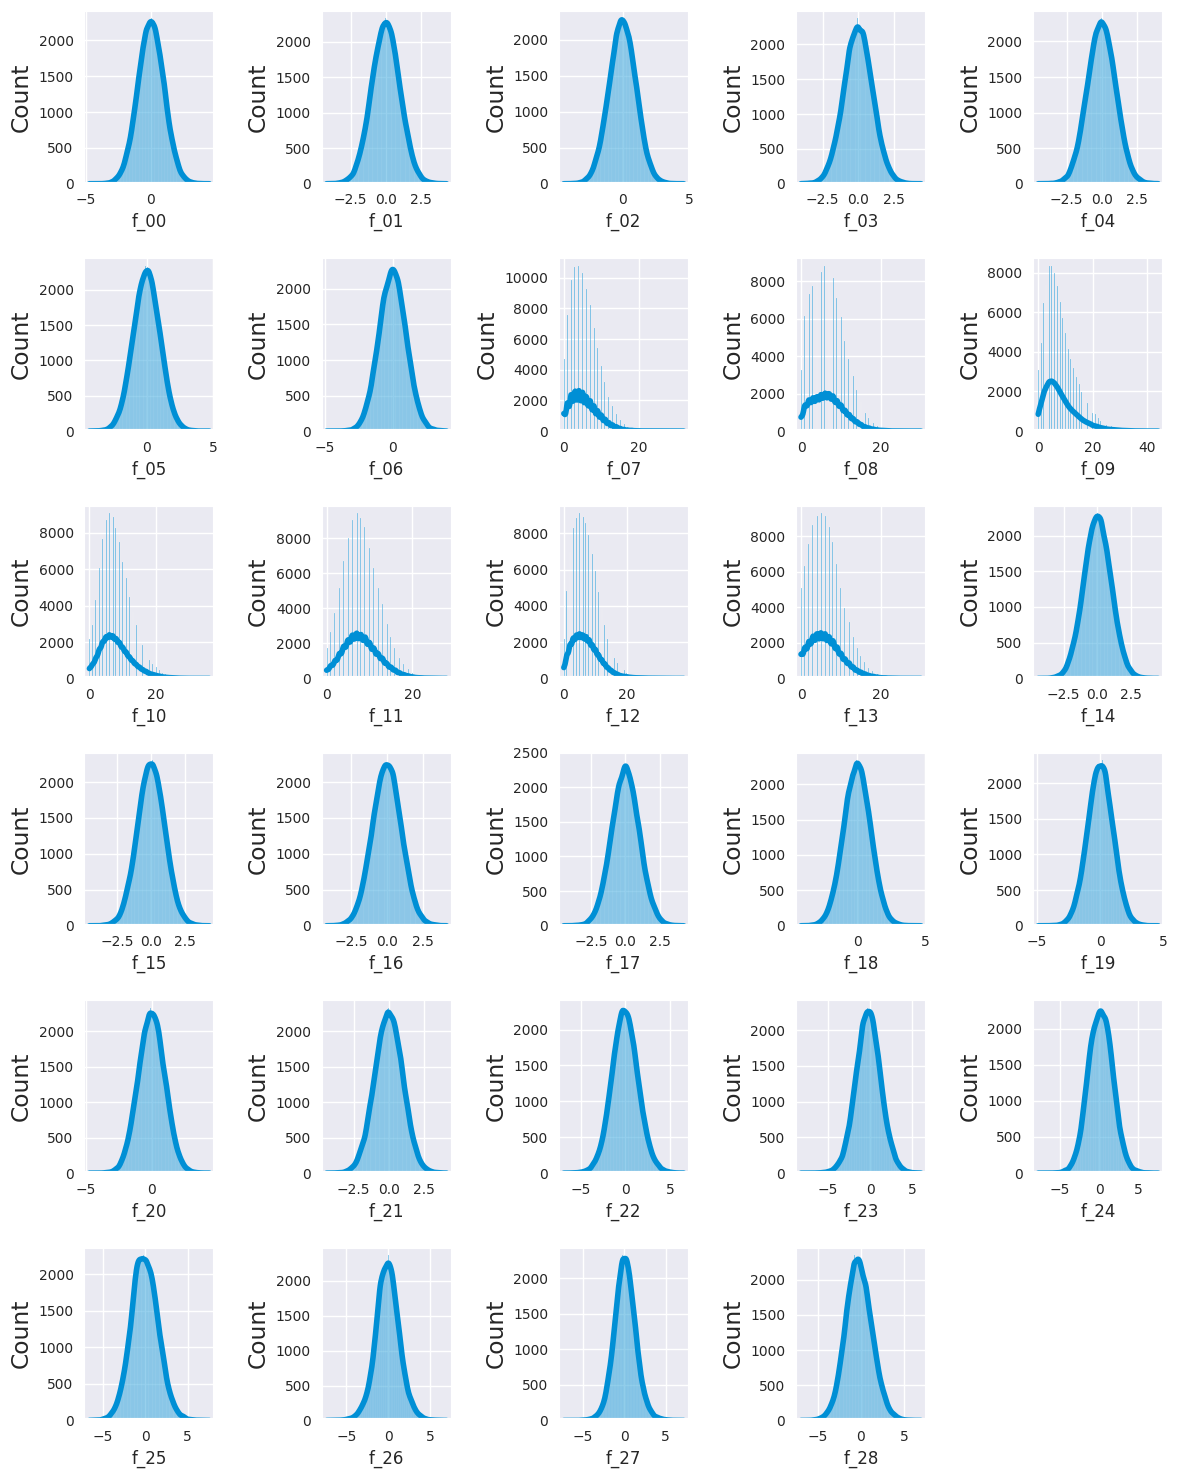

In [14]:
plt.figure(figsize=(12, 15))
for i, c in enumerate(df.columns):
    plt.subplot(6, 5, i + 1)
    sns.histplot(df[c], kde=True)
    plt.xlabel(c, fontsize=12)
plt.tight_layout()
plt.show()

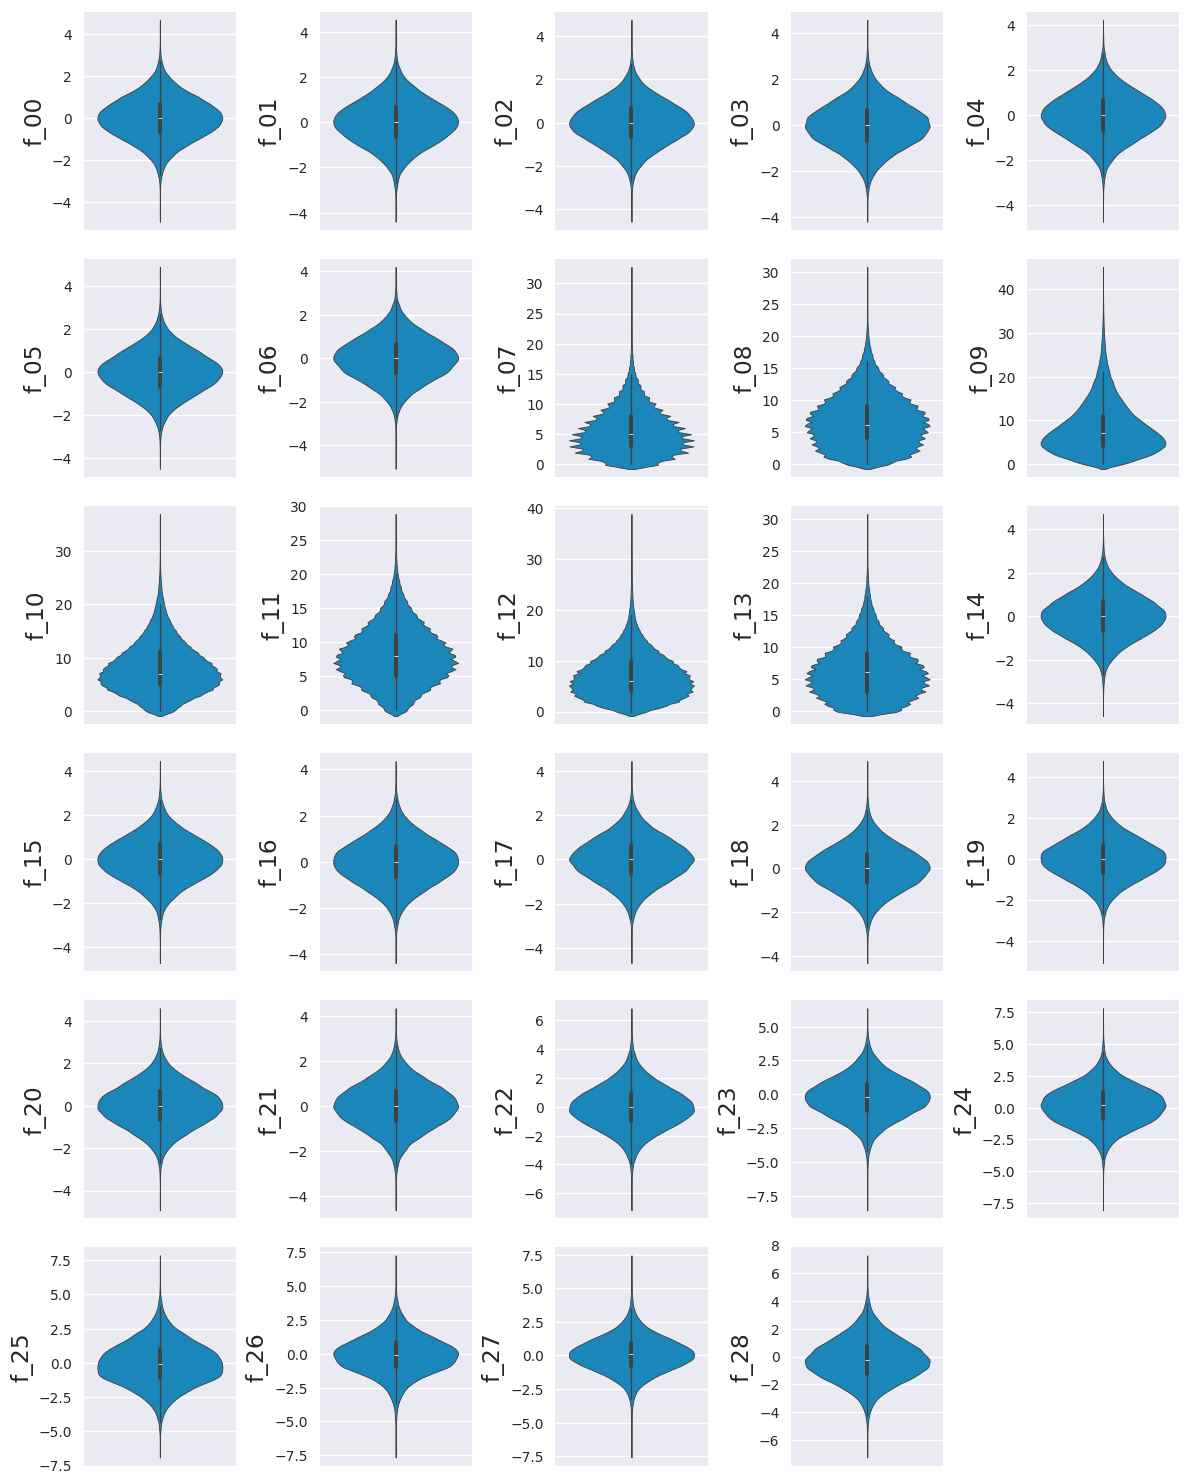

In [16]:
plt.figure(figsize=(12, 15))
for i, c in enumerate(df.columns):
    plt.subplot(6, 5, i + 1)
    sns.violinplot(df[c])
plt.tight_layout()
plt.show()

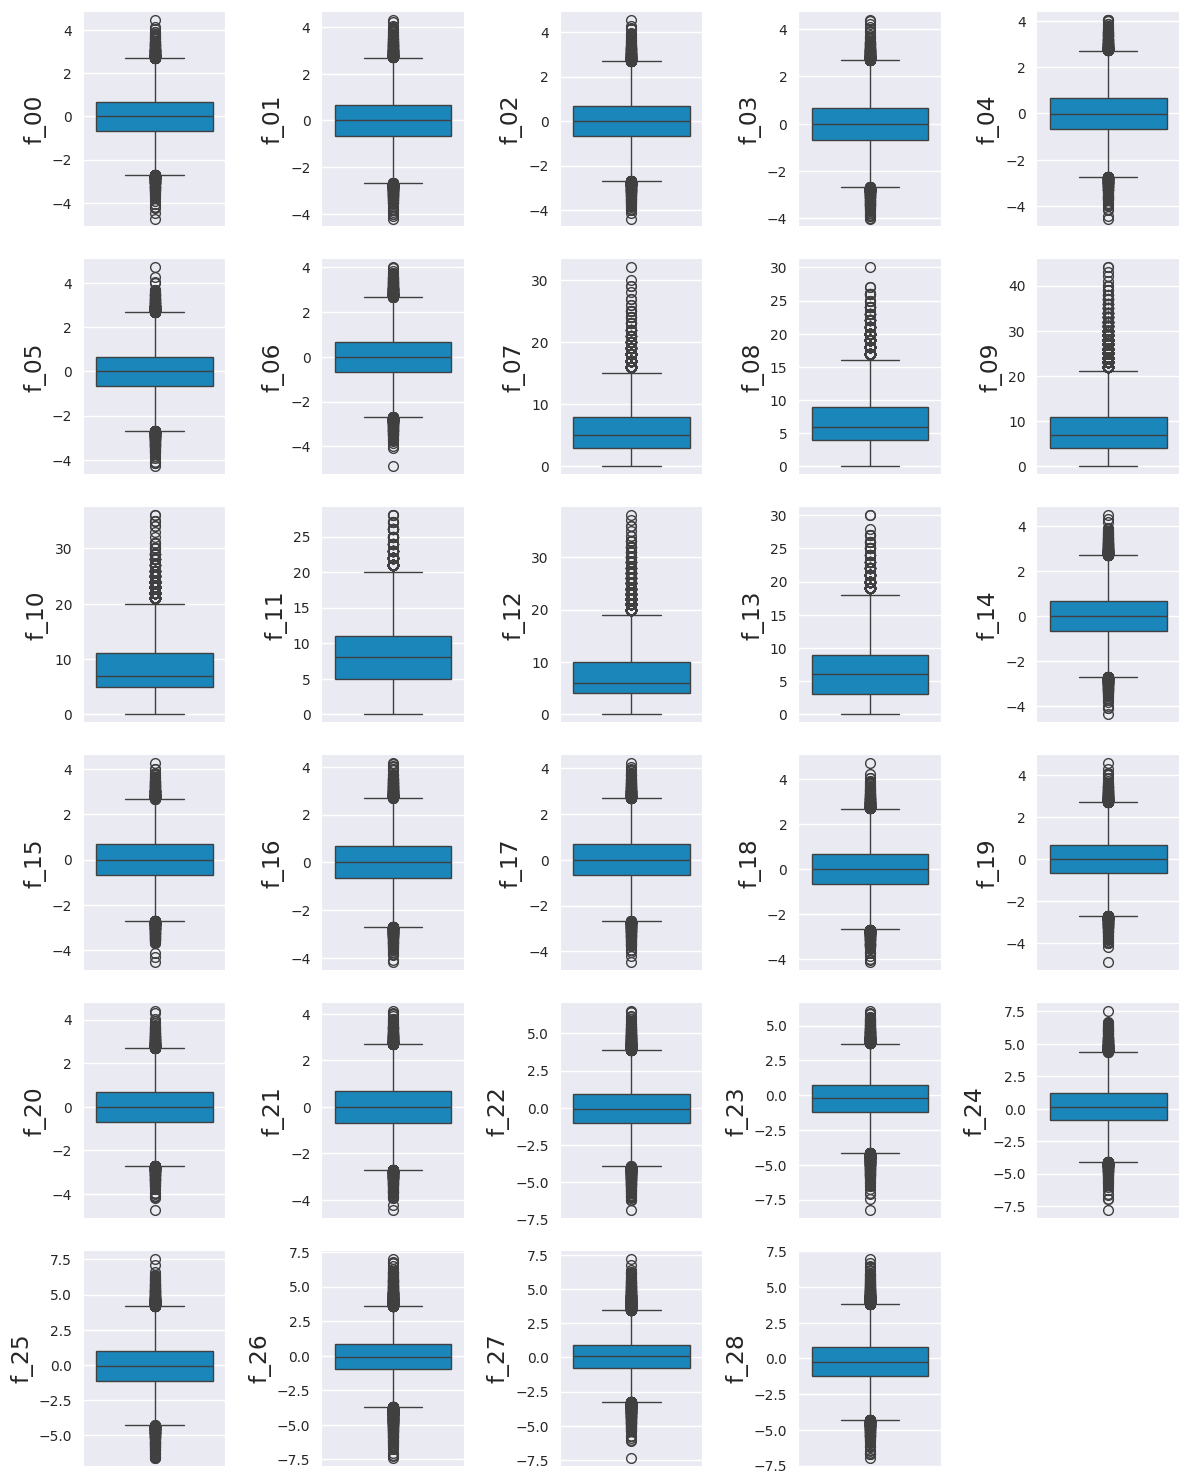

In [17]:
plt.figure(figsize=(12, 15))
for i, c in enumerate(df.columns):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(df[c])
plt.tight_layout()
plt.show()

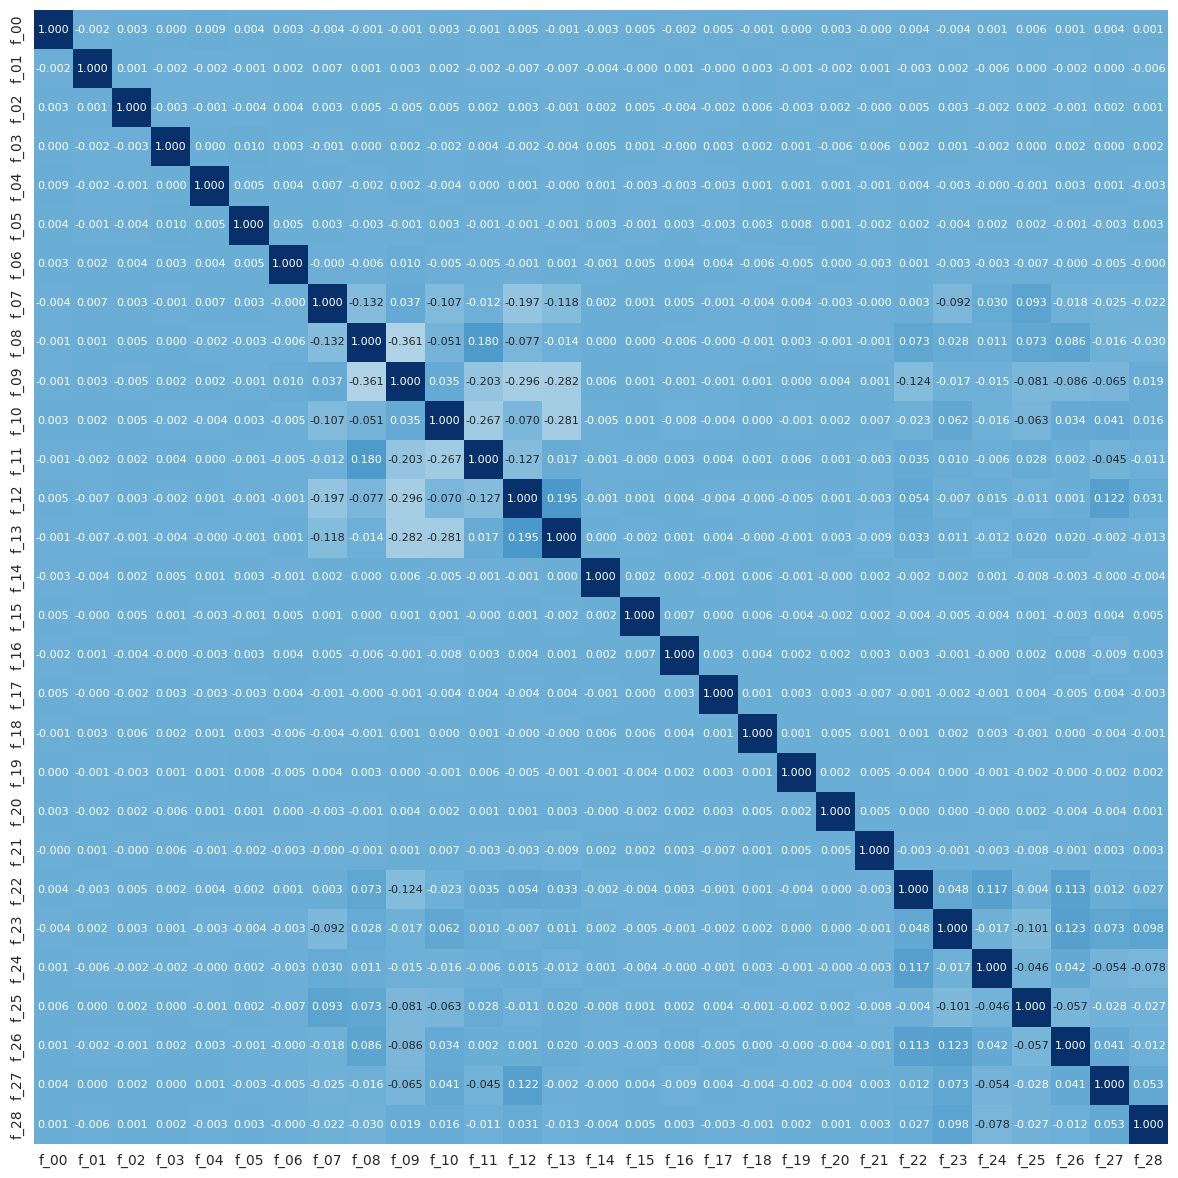

In [31]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={'size': 8},
    cmap='Blues',
    vmin=-1,
    vmax=1,
    center=0,
    cbar=False,
    fmt='.3f',
)
plt.tight_layout()

## 4. Data Preprocessing

In [34]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

## 5. Clustering

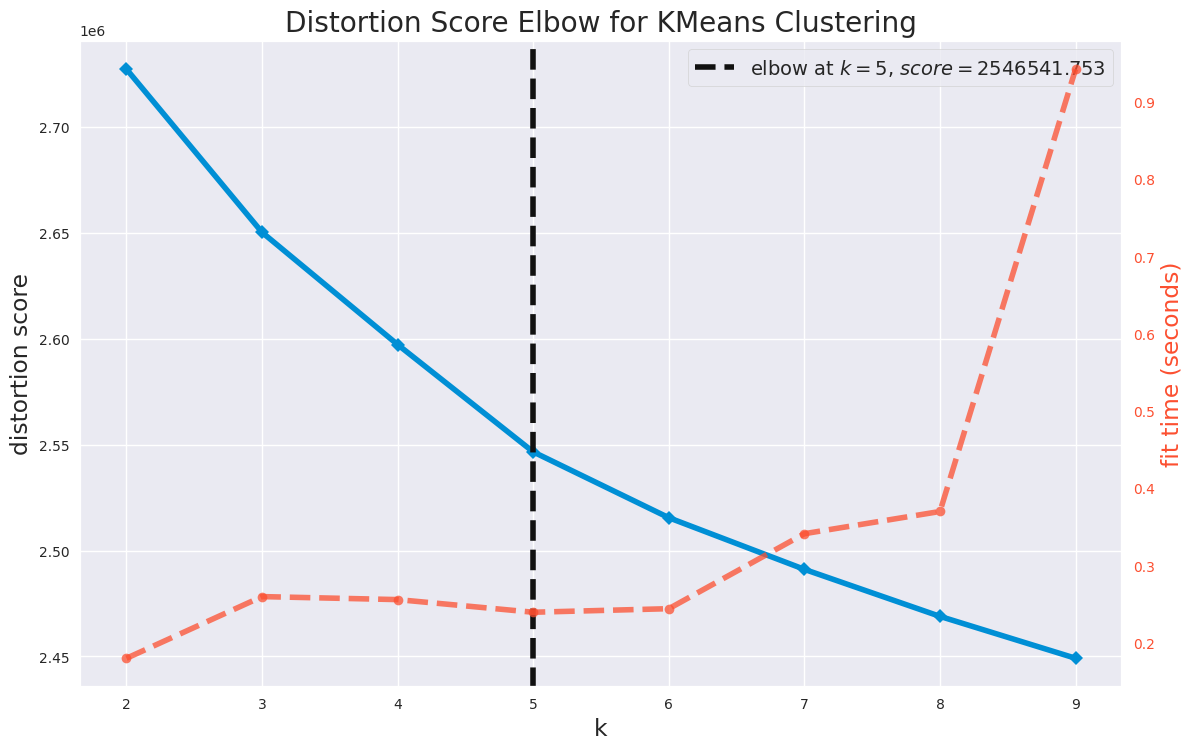

In [38]:
kmeans = KMeans(random_state=42)

visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(x_scaled)
visualizer.show();

## 6. Building the Model, Saving the Model, Making Submission

In [40]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])
pipeline.fit(df)

,steps,"[('scaler', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [46]:
joblib.dump(pipeline, 'mc_clustering_pipeline.pkl')

['mc_clustering_pipeline.pkl']

In [50]:
predictions = pipeline.predict(df)
submission = pd.DataFrame({
    'Id': df.index,
    'Predicted': predictions
})
submission.head()

,Id,Predicted
0,0,3
1,1,4
2,2,3
3,3,2
4,4,4


In [51]:
submission.to_csv('submission.csv', index=False)

## 7. Conclusion
We built a machine learning pipeline to cluster the manufacturing control data. We used the `KMeans` algorithm with finding the optimal number of clusters using the `KElbowVisualizer`. We saved the pipeline for future use and used it to generate predictions for the dataset.